# Convolution and Autocorrelation

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

## Motivation and concept

Instruments measure everything: for example, mass, energy, number of particles, wavelength of light, voltage, current, and images. However, every instrument distorts the data to a greater or lesser extent, and obviously we try to make these distortions insignificant but this is not always possible. In cases when a detector may not respond quickly enough to an event, when very wide slits have to be used in a spectrometer to detect a weak signal, or an electronic circuit does not respond in a linear manner to the input voltage, a distortion to the data is unavoidable. The effect is to _convolute_ the ideal response, as defined by the physics behind the experiment, with the instrumental response. Fortunately Fourier transforms can usually be used to unravel the effect of convolution, however, in some circumstances this may not be possible.

## 7.1 Examples

**(i)** To be specific, suppose that the lifetime of electronically excited atoms or molecules is to be measured by exciting them with a pulse of light and their fluorescence measured as it decays with time. This fluorescence could be observed with a photodiode or photomultiplier, whose output voltage is measured with an oscilloscope. Before doing this experiment, two questions have to be answered;

**(a)** Is the laser used to excite the molecules of short enough duration that the molecules or atoms can be excited quickly enough before any significant number can decay back to the ground state? 

**(b)** Is the detection equipment (photodiode, oscilloscope) used able to respond quickly enough to measure the decaying fluorescence properly? 

![Drawing](fourier-fig24.png)

Figure 24. Top: A signal representing the ideal response of an experiment to a sudden impulse. Middle: The actual stimulation used in the experiment represented as the instrument response. Bottom: The measured signal, the convolution of the two upper curves.
____

If either one or both of these conditions cannot be met, then the data will be distorted by the relatively slow response of the instrument. The convolution curve in fig 24 shows how this distortion affects some data. In this figure, the top curve is the ideal decay of the excited state, but it could represent any ideal response. This behaviour would be observed if the molecules could be excited with an infinitesimally narrow laser pulse and measured with a photo-detector with an unlimited time response. The second curve is the actual shape of the laser pulse, and/or detector response, and is the 'instrument response' drawn on the same timescale. Clearly, this has a width and a rise and decay time that is not so very different to that of the ideal response. The lower curve is the convolution of the ideal response with the instrument response, and is what would be measured experimentally and clearly has characteristics of both curves. A log plot of the data would show that only at long times does the convoluted response have the same slope as the ideal one. It makes no difference if the instrument response consists of a slow 'driving force' for the experiment, in this case a long-lived light-pulse, or a slowly responding detector or both, because the effect producing the convolution is the same. Fortunately, convolution can be calculated easily and rapidly using Fourier transforms.

![Drawing](fourier-fig25.png)
Figure 25. The convolution of a narrow spectral line with a wide slit in a spectrometer.

____

**(ii)** As a second example, consider measuring the width or position of one particular spectral line, such as from a star or a sample of molecules in the lab. The spectrometer has slits on its entrance and exit and these, with the number of grooves in the grating, control the resolution of the spectrometer. Typically, this is $0.1$ nm/mm of slit width for a moderately good spectrometer and 1 nm/mm for a general purpose one. If the slits cannot be closed to more than $0.1$ mm, then the resolution of the general purpose instrument will be approximately 0.1 nm and a narrow spectral line will appear to have this value even it is many times narrower. This is because the grating is rotated while measuring the spectrum and the spectral line is swept across the slits. The effect is to sequentially place a spectral line at all possible points, and hence wavelengths, across the slit. A signal is recorded at all these wavelengths rather than being measured only at its proper one, and the response measured is the convolution of the ideal width of the spectral line with the instrument response, which is the finite width of the slit. In many instruments, a CCD camera measures all wavelengths simultaneously, and a slit is not needed nor is the grating scanned. However, the same reasoning applies because the individual elements of the camera have a finite width, which therefore act as individual slits.

**(iii)** A final use of convolution is to smooth data. Because convoluting one function with another involves integration, this has the effect of summing or averaging. The rolling or moving average method (Section 10.4) is in effect a convolution, and effectively smooths spiky data.


## 7.2 How convolution works

In the next sections, a convolution will be calculated by direct summation and by a Fourier transform. Convolution is related to the auto- and cross-correlations and these will also be described. How to go about estimating the true response from the convoluted response in real, that is experimental data, i.e. reversing the effects of convolution, is discussed in chapter 13 on numerical methods. This is usually done using iterative, non-linear least-squares methods, (See 13.6.7), because when using real data, which always contains noise, it is found that reverse transforming the convolution often results in a calculated ideal response that is so noisy as to be useless.

![Drawing](fourier-fig26.png)

Figure 26. Curves show the instrument response (red), made up as a series of impulses (dotted), which produce a response ($w$) at each point on its profile any a few of which are shown. These are then added together in this time delayed manner, to produce the convoluted response.
____

To understand how convolution works, suppose that the overall instrument response is made up of a series of $\delta$-function impulses. These can be infinitesimally narrow light pulses that excite a molecule. Suppose these impulses are made at ever shorter time intervals, then the effect is that of smoothly exciting the molecule. Each of the impulses elicits an ideal response but because there are many of them, their responses must be added together. The result is the convolution; the effect is shown in Fig. 26. It is always assumed in the convolution that the response is linear with the impulse, which simply means that doubling the impulse doubles the response and so forth.

The light pulses occur at each point in the dashed curve, Fig. 26. The response from each impulse is the decaying solid curve. To calculate the overall response at any given point along the x-axis, the effect of all previous impulses must be added into the calculation. Suppose that the pulse exciting the sample has a shape given by some function $f$, the ideal experimental response $w$, and the convolution $C$. The terms can be written down at each time if it is assumed, for the present, that the impulses are discrete and the data is represented as a series of points at times $1, 2, 3$, and so forth; $f$(6), for example, represents the value of $f$ at the sixth time position. The first point of the impulse is $f$(1) and this produces the response

$$\displaystyle f (1)[w(1) + w(2) + w(3) + \cdots]$$

The second and third impulses produce

$\displaystyle f(2)[w(1) + w(2) + w(3) + \cdots]$ and $f(3)[w(1) + w(2) + w(3) + \cdots]$.

The convolution is the sum of these terms at times 1, 2, 3, and so on therefore;

$$\displaystyle\begin{align}
C(1)& = f (1)w(1)\\
C(2)& = f (1)w(2) + f (2)w(1)\\
C(3) &= f (1)w(3) + f (2)w(2) + f (3)w(1)\\
C(4)& = f (1)w(4) + f (2)w(3) + f (3)w(2) + f (4)w(1)\\
\end{align}$$

These sums are shown in Fig. 27 by adding the products of $f$ and $w$ vertically. Clearly, only where both $f$ and $w$ are not zero, will this product have a value. The symmetry in these sums soon becomes apparent, each being the product of one series running to the right, and the other to the left; for instance, look at $C$(4). The name convolution arises from just this effect; the word also means 'folded' and this is shown in the form of the series where each function is folded back onto the other. Convolution is also the distribution of one function in accordance with a 'law' specified by another function (Steward 1987) because the whole of one function $w$, is multiplied with each ordinate of the other $f$, and the results added. The ideal response (the 'one function') is distributed, i.e. spread out according to the law or shape of the driving function $f$.

![Drawing](fourier-fig27.png)

Figure 27. Diagram showing the notation used to calculate a convolution.

______

## 7.3 Convolution by summation

Written as a summation, the convolution at point $k$ is

$$\displaystyle C(k) = \sum_{i=0}^k f(i)w(k - i )   \qquad\tag{32}$$

This sum evaluates just one point; to calculate the whole convolution, the index $k$ must now be varied from 1 to $n$, which is the number of data points, making a double summation. One reason Fourier transforms are used to calculate convolutions is that the fast Fourier transform algorithm, FFT, is far quicker on the computer than calculating the convolution as a double summation, particularly for a large number of data points.

The algorithm to calculate the summation has a double loop to calculate all values of $k$ and to perform the summation in eqn. 32. The two functions used are those that produced Fig. 24, which are $\displaystyle f(t) = e^{-t/100}$ and $\displaystyle w(t) = e^{-(t-100)^2/1000}$, and $2^{10}$ points will be also be used to mimic the data produced by an instrument.

First, because the data is discrete, arrays $f$ and $w$ are made; to hold the data points. Then two loops are made, one changes $k$ from 1 to $n$ the and inside one calculates $C(k)$. The indices are arranged as in equation 32. The variable $s$ accumulates the sum as the inner do loop progresses. This is a relatively slow calculation because of the double loop.

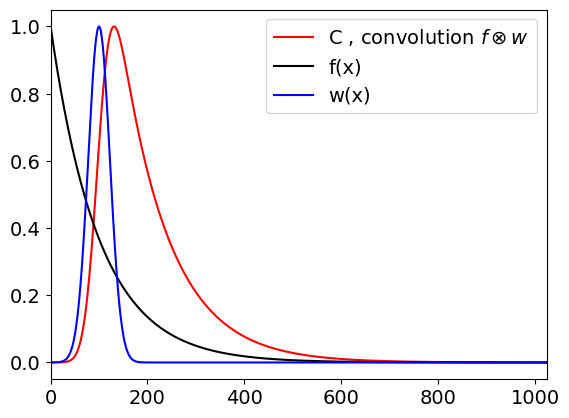

In [2]:
# algorithm convolution by double summation
#---------------------------
def do_convolution(f,w):   # f and w are arrays 
    # Sigma f(n-m)g(m) ;   c(0) = f(0)w(0),    c(1) =  f(0)w(1) + f(1)w(0)  etc 
    n = len(f)
    c = [0.0 for i in range(n)]
    for k in range(n):
        s = 0.0
        for i in range(k):
            s = s + f[i]*w[k-i]
            pass
        c[k] = s
    return c
#---------------------------

n = 2**10
f = [ np.exp(-i/100.0)  for i in range(n)]
w = [ np.exp(-(i-100)**2/1e3) for i in range(n)]
t = [i for i in range(n)]

C = do_convolution(f,w)
mxc  = max(C)         # use to normalse
plt.plot(t,C/mxc,color='red',label='C , convolution '+r'$f\otimes w$')
plt.plot(t,f,color='black',label='f(x)')
plt.plot(t,w,color='blue',label='w(x)')
plt.xlim([0,n])
plt.legend()
plt.show()

## 7.4 Convolution by Fourier transform

The convolution can also become an integral, by supposing that the points are separated by an infinitesimal amount, and therefore, the change $sum \rightarrow \int $  is allowable. The integral form of the convolution at time $u$, is

$$\displaystyle C(u)=\int_{-\infty}^\infty f(t)w(u-t)dt \qquad\tag{33}$$

which represents the response at time $u$ to an impulse delivered at time $t$. The limits to the integral are often represented as $\pm \infty$. If the signal is zero at times less than zero, then the lower limit can be made zero. 

The convolution integral is frequently written as,

$$\displaystyle C(t) = f (t) \otimes w(t) \qquad  \text{ or } \qquad C = f \otimes w \qquad\tag{34} $$

The convolution is performed by Fourier transforming functions $f$ and $w$ separately, multiplying the transforms together and then inverse transforming. The symbol $\otimes$ represents all these calculations because the result is returned in the time domain. Sometimes, the convolution is written only as a conversion into the frequency domain as

$$\displaystyle f(t)\otimes w(t) = \sqrt{2\pi} F(\omega)W(\omega)$$

where $F$ and $W$ are the respective fourier transforms of $f$ and $w$, $\omega$ being angular frequency. Thus convolution in 'normal' space is multiplication in 'Fourier' space.

If $T$ represents the Fourier transform and $T^{-1}[\cdots]$ the inverse transform the convolution is formally written as

$$\displaystyle C = T^{-1}[\,T( f )T(w)\,]    \qquad\tag{35} $$

which is the same as equation 34. If the equations describing $f$ and $w$ are known, an exponential and a Gaussian for example, then 

$\quad$(a) the Fourier transform integral of each function is calculated as described in Section 6, 

$\quad$(b) these are multiplied together and 

$\quad$(c) the inverse transform integral calculated. 

The result of these three operations is the convolution of the two functions in other words 

$\quad$(1) the convolution of two functions is the transform of the product of their individual transforms: $\displaystyle T[\,T( f )\cdot T(w)\,]   $.

Other statements are also true

$\quad$(2) The transform of a convolution is the product of the transforms: $T^{-1}[f(t)\otimes w(t)]=T(f)\cdot T(w)$.

$\quad$(3) The transform of a product is the convolution of the transforms: $T(f\cdot w)=T(f)\otimes T(w)$.

$\quad$(4) The product of two functions is the reverse transform of the convolution of their transforms: $f\cdot w=T^{-1}[ T(f)\otimes T(w) ]$.


### **Proof of convolution as transform**

The proof that the convolution is a product of transforms starts with the definition in eqn 33 the transform is made and the order of integration is changed. (The limits are removed for clarity and are $u,t \pm \infty$ and replaced with the variable). The first step is to convert $w$ into its fourier transform, which introduces another integral

$$\displaystyle \int_{u}\int_{t} f(t)w(u-t)\,dt \,e^{-i\omega u} du =\int_{t}f(t)\left[\int_{u} w(u-t)e^{-i\omega u} du \right]\,dt $$

changing $s= u-t$ and rearranging

$$\displaystyle \int_{t}f(t)\left[\int_{s} w(s)e^{-i\omega (s+t)} ds\right]\,du =\int_{-\infty}^\infty f(t)e^{-i\omega t}dt\int_{-\infty}^\infty w(s)e^{-i\omega s} ds \equiv F(\omega)W(\omega)$$

which shows that the convolution is the product of the fourier transforms in transform space. Note that the $t$ and $u-t$ in the convolution have both become frequency in the transformed equation. Note also that $s$ is a dummy variable as it is the integration variable, any other symbol could be used, $t$ for example as long as it does not conflict with another.

As an example, consider convoluting a square pulse with two delta functions. Their convolution will produce two square pulses centred on the two delta functions, because, as the pulse is swept past the two deltas, only at their overlap will their product have a finite value. Three stages of the convolution are shown at the top of Fig. 28, and the result is shown below this.

![Drawing](fourier-fig28.png)

Figure 28. Convolution as Fourier transforms.
____

Next, the convolution is evaluated using Fourier transforms. The transforms of the two delta functions and the pulse have already been calculated, and are shown in Fig. 29. This product of the two transforms is then reverse transformed and two square pulses are produced.

This last convolution is, incidentally, another way of describing the interference due to a double slit, and if many delta functions are used then this describes the effect of a diffraction grating on light waves.

The data needed in a convolution is frequently a list of numbers because it comes from an experiment and in this case a numerical method has to be used to do the transform, which is then called a Discrete Fourier Transform. This is described further in Section 9, but here is an example some code to illustrate convolution using discrete Fourier transforms.

![Drawing](fourier-fig29.png)

Figure 29. Left: The two waveforms are the Fourier transform of a square pulse (top) and two delta functions (lower). When these are multiplied together and reverse transformed two pulses are produced which is the convolution of the delta functions and the single square pulse. The same method has been used to make Fig. 24, even though the functions differ.
______

### **Shifting a wavepacket: $T(f\cdot w)=T(f)\otimes T(w)$:   Products and transforms**

As an illustration that the transform of a product is the convolution of the transforms we examine a wavepacket which  has the form of a complex exponential modified by a gaussian envelope, fig 29a. A femtosecond laser pulse could have this time profile, a vibrational wavepacket this shape with bond extension $x$.  The wavepacket is

$$\displaystyle f(t)= e^{ikx}e^{-x^2/2\sigma^2}$$

where $\sigma$ is the variance of the envelope. You can see that this function is the product of an exponential and a Gaussian. Its fourier transform is therefore the convolution of the transform of these two functions. The exponential has the transform (see table 6.7) $\delta(k-k_0)$ and the Gaussian  $\sigma e^{-\sigma^2k^2/2}$.

The convolution and hence transform is

$$\displaystyle \int_{-\infty}^\infty  \sigma e^{-\sigma^2k^2/2}\delta(k-k_0) dk = \sigma e^{-\sigma^2(k-k_0)^2/2}$$

and because the delta function is everywhere zero except at $k=k_0$ the integral need not be performed as one value only is selected and the result written down. This shows that the transform is also a gaussian but shifted by an amount $k_0$ as shown in figure 29a.

![Drawing](fourier-fig29a.png)

Figure 29a. A Gaussian wavepacket shifted by convolution with the $\delta$ function $\delta(k-k_0)$ in $k$ space. The various widths are shown as red lines. The left hand panel shows the function in 'real' $x$ space, the right hand one in transform $k$ space. The constants used were $\sigma=1,k_0=10$.
________

### **Code example of convolution by fourier transform**

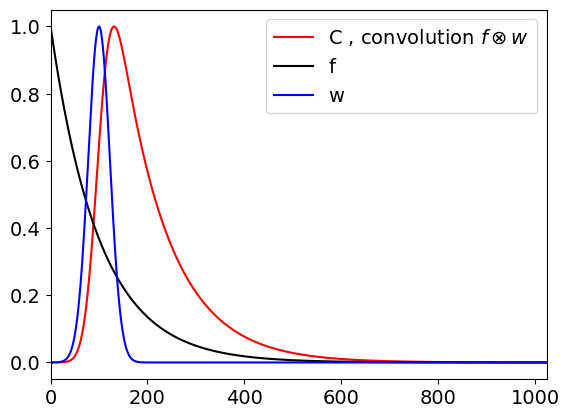

In [3]:
# convolution by fourier transform

n = 2**10
f = [ np.exp(-i/100.0) for i in range(n)]
w = [ np.exp(-(i-100)**2/1e3) for i in range(n)]
t = [i for i in range(n)]

F = np.fft.rfft(f)        # use rfft as input in only real 
W = np.fft.rfft(w)
C = np.fft.irfft(F*W)

mxc  = max(C)         # use to normalse

plt.plot(t,C/mxc,color='red',label='C , convolution '+r'$f\otimes w$')
plt.plot(t,f,color='black',label='f')
plt.plot(t,w,color='blue',label='w')
plt.plot()
plt.xlim([0,n])
plt.legend()
plt.show()

## 7.5 A warning and a Solution

Finally a warning about using Fourier transforms to perform convolution. The transform assumes that the function being transformed is periodic, this means that if the signal is not of the same size, such as zero,  at its start and end there is a frequency associated with changing from end to start so that this will appear as an artifact in the convolution. THis occurs because the transform assumes that the signal is periodic. This does not arise in the case of the summation method and even though this may be slower to calculate, it is more robust.  The difference is shown in the next figure 29b. On the left is shown the summation based convolution calculation using an exponential, with lifetime of 10000, and a Gaussian and on the right using the Fourier transform method. All is not lost, however, because by padding the data with zeros to double its length the correct result can be obtained. 

![Drawing](fourier-fig29b.png)

Figure 29b. The figure shows the difference between the correct convolution done by summation ( red curve left ) and the artefact introduced by using the Fourier method ( red curve right ) this is produced when the functions are not the same size, preferably zero, at the start and end of the data.
________

## 8 Autocorrelation and cross-correlation

A correlation is a function that measures the similarity of one set of data to another. A cross-correlation is formed if the data are dissimilar, an autocorrelation if there is only one set of data. The data might be a voltage from a detector, it might be an image or residuals from fitting a set of data.  In Fig. 30 part of a noisy sinusoidal curve is shown in black and labelled 1. The second curve (2, red) is displaced only a little from the first and is clearly only slightly different; the third (3, grey) which is displaced by more is clearly different from the first as it is positive at large $x$ when the first curve is negative. The right-hand figure shows the autocorrelation of the curve (1) shown on the left, and as this is an oscillating curve, the autocorrelation also oscillates but eventually reaches zero. The oscillation is a result of the fact that a sinusoidal curve is similar to itself after each period, and the autocorrelation measures this similarity by increasing and decreasing. The autocorrelation is also less noisy that the data because it involves summing or integrating over many data points. 

A random signal with an average of zero will have an autocorrelation that averages to zero at all points except the first, whereas the autocorrelation of an exponential and similar functions will be not be zero, but decay away in some manner. The autocorrelation is a likened to a measure of the 'memory' a function has, that is, how similar one part of the data is with an earlier or later part. A zero average random signal has no memory because it is random, and each point is independent of its predecessor; this is not true of any other signal. The correlation is therefore a process by which we can compare patterns in data. In data analysis, the residuals, which are the difference between the data and a fitted function, should be random if the fit is correct; the shape of the autocorrelation is therefore a way of testing this.

![Drawing](fourier-fig30.png)

Figure 30. A sketch showing the first $120$ points of a set of noisy data of $250$ points. The data is still somewhat similar to itself when displaced by only a few points but much less so, when displaced by many, dashed grey curve. The autocorrelation of all the data is shown on the right. Notice also how as autocorrelation integrates the data, the noise is reduced.
_________

##  8.1 Applications 

In ultra-fast (femtosecond) laser spectroscopy, autocorrelations are used to measure the length of the laser pulse because no electronic device is fast enough to do this, as they are limited to a time resolution of a few tens of picoseconds at best, but laser pulses can be less than $10$ fs in duration. In single molecule spectroscopy, the correlation of the number of fluorescent photons detected in a given time interval is used to determine the diffusion coefficient of the molecules. In the study of the electronically excited states of molecules, the correlation of time resolved spectra, recorded as the molecule moves on its potential energy surface, is a measure of excited state and solvent dynamics.  Perhaps the most important application is in FTIR spectroscopy. 

The signal from an FTIR spectrometer is the autocorrelation of the infra-red radiation because in this instrument one arm of the (Michaelson) interferometer is moved relative to the other thus changing i.r. radiation's pathlength. The two beams interfere on the detector forming the autocorrelation, see section 5.2 and figure 12. More details are given shortly in section XX. 

Two dimensional cross correlation is used in imaging for example to identify a particular feature by correlating two images. High spots in the correlation show where the images have similarities.

## 8.2 Calculating the correlation

The correlation function is similar to, but different from, convolution. The autocorrelation is always symmetrical about zero displacement or lag, the cross-correlation is not. In the convolution the two functions $f$ and $w$ are folded on one another, the first point of $f$ multiplying the last of $w$ and so on, until the last point of $f$ multiplies the first of $w$, equation 31. In the auto- and cross-correlation, one function is also moved past the other and the sum of the product of each term is made but with the indices running in the _same direction_, both increasing. 

A cross-correlation is shown in Fig. 31 using a triangle $w$ and a rectangle $f$, each with a base line, and for clarity, defined with only six points. The first term in auto- or cross-correlation $A$ occurs when point $f$(6) overlaps with $w$(1), when $f$ is to the far left of $w$. The position at $-5$ to the left is shown in the figure as $A$(-5). The middle term in the correlation is at zero displacement, or lag, and there is total overlap of the two shapes and the correlation is at a maximum. The figure on the right shows the last overlap, consisting of just one point in common between the two shapes. There are six terms in the summation of $A$(0) down to one in each of $A$(-5) and $A$(5). The zero lag term is

$$\displaystyle A(0) = f (1)w(1) + f (2)w(2) + \cdots + f (6)w(6)$$

The next term has one point displacement between $f$ and $w$ and five terms are summed,

$$A(1) = f (1)w(2) + f (2)w(3) + f (3)w(4) + f (4)w(5) + f (5)w(6)$$

With two points displaced, there are four terms

$$\displaystyle A(2) = f (1)w(3) + f (2)w(4) + f (3)w(5) + f (4)w(6) $$

and so forth for the other terms. The last overlap is

$$\displaystyle A(5) = f (1)w(6)   \qquad\tag{36}$$

On the negative side, the indices are interchanged, $f$ for $w$ and vice versa, and the first (far left) term is
$A(-5) = f (6)w(1)$ and similarly for the other terms. There are 11 terms in all or, in general $2n - 1$, for data of $n$ points. In an autocorrelation, $f$ and $w$ are the same function and therefore the autocorrelation must be symmetrical and only terms from zero to five are needed, the others being known by symmetry.

![Drawing](fourier-fig31.png)

Figure 31. A pictorial description of cross-correlation of the signals (functions) $w$ a traingle and $f$ a 'top-hat' or rectangle.
____

The formula for the autocorrelation for $n$ data points is

$$\displaystyle A_a(k)=\sum_{i=0}^{n-k}f(i)f(k+i) \qquad k=0,1,\cdots \rightarrow \cdots n   \qquad\tag{37}$$

where the first value of the displacement $k$ is zero, and the last $n$, and both functions are now labelled $f$. Very often the autocorrelation is normalized; this means dividing by $\sum f(i)^2$, 

$$\displaystyle A_a(k)=\frac{\sum\limits_{i=0}^{n-k}f(i)f(k+i)}{\sum f(i)^2}   \qquad\tag{38}$$

These last two formulae produce just half of the autocorrelation. To produce the full correlation, symmetrical about zero lag, the mirror image of equation (37) must be added as points $-n \to -1$ to the left-hand part of the data.

The cross-correlation uses a similar formula

$$\displaystyle A_c(k)=\sum\limits_{i=0}^{n-k} f(i)w(k+i) \qquad k=-n+1,\cdots 0, \cdots n-1  \qquad\tag{39}$$

but now $k$ always ranges from $-n + 1 \to n - 1$. This distinction is crucial, otherwise the whole of the cross-correlation is not calculated.

In calculating a correlation as a summation with a computer, as with a convolution, each term in the correlation is a sum, so this means that two nested 'loops' are needed to calculate the whole function; one loop sums each individual term, the other calculates the sum, $A(k)$.

Some authors define the correlation up to a maximum of $n$ in the summation, not $n - k$. There is, however, a pitfall in doing this because, if the correlation is not zero above half the length of the data, then this folds round and what is calculated is the sum of the correlation plus its mirror image. The way to avoid this is to add $n$ zeros to the data and the summation continued until $2n$. This should be done routinely if Fourier transforms are used to calculate the correlation.

Correlations and convolution are not restricted to digitized data but apply also to normal functions. Written as an integral, the cross-correlation of a real, i.e. not complex, function is

$$\displaystyle A_c(u) =\int_{-\infty}^{\infty}f(t)w(u+t)dt  \qquad\tag{40}$$

and the autocorrelation of $f$,

$$\displaystyle A_a(u) =\int_{-\infty}^{\infty}f(t)f(u+t)dt  \qquad\tag{41}$$

Notice that the sign in the second term is positive in the correlation but negative in a convolution, equation (33). Some authors multiply by a normalising term $1/\sqrt{2\pi}$ to the autocorrelation but we shall ignore this constant as in most applications it is not usually necessary to know it. The autocorrelation is an even function thus

$$\displaystyle A_a(u)=A_a(-u)$$

and if the function contains a complex number, then the conjugate is always placed on the left,

$$\displaystyle A_a(u) =\int_{-\infty}^{\infty}f(t)^*f(u+t)dt  \qquad\tag{41}$$

The normalised autocorrelation is 

$$\displaystyle G(u) = \frac{\int\limits_{-\infty}^{\infty}f(t)^*f(u+t)dt}{\int\limits_{-\infty}^{\infty}f(t)^2dt}  =\frac{\langle f(t)\,f(u+t)\rangle}{\langle f(t)^2\rangle}   \qquad\tag{42}$$

and the bracket notation indicates that these are average value. The denominator is the normalization term and is also the value of the numerator with $u = 0$.

If $f(x)$ is complex then it is conventional to write 

$$\displaystyle A_a(u)=\int_{-\infty}^\infty f(t)f^*(u-t)dt\qquad\text{or}\qquad \displaystyle A_a(u)=\int_{-\infty}^\infty f^*(t)f(u+t)dt $$

where * indicates the complex conjugate.

## 8.3 Comparison with convolution and a fourier transform.

The convolution and correlation are very closely related , the convolution integral has the form 

$$\displaystyle  C(u)= \int f(t)w(u-t)dt \qquad \text{convolution}$$

whereas the correlation is 

$$\displaystyle A_c(u)=\int f(t)w(u+t)dt\qquad \text{correlation}$$

and as with a convolution, an autocorrelation can be represented as a fourier transform. To show this start by  replacing $f$ and $w$ by their transforms which we call $g$ and $h$ respectively, and to be general suppose that $f$ and $w$ are complex then the change is $f\to f^*$ which is its complex conjugate. 

$$\displaystyle A_c(u)=\int_{-\infty}^\infty \left[\int_{-\infty}^\infty g^*(\omega)e^{i\omega t} d\omega\right]\left[ \int h(\omega' ) e^{-i\omega'(t+ u)}d\omega'\right]dt $$

$$=\int_{-\infty}^\infty \int_{-\infty}^\infty \int_{-\infty}^\infty g^*(\omega)h(\omega')e^{i\omega t} e^{-i\omega'(t+ u)}dt  d\omega d\omega'$$

$$=\int_{-\infty}^\infty \int_{-\infty}^\infty g^*(\omega)h(\omega')\int_{-\infty}^\infty e^{-i(\omega'-\omega) t}dt e^{-i\omega'u}  d\omega d\omega'$$

the integral in $dt$ is the delta function $\delta(\omega'-\omega)$ which is zero unless $\omega=\omega'$ which leaves one integral

$$A_c(u)=\int_{-\infty}^\infty  g^*(\omega)h(\omega)e^{-i\omega u}  d\omega $$


In the case of an autocorrelation $f=w$ and

$$\displaystyle A_a(u)= \int_{-\infty}^\infty f(t)f(u+t)dt =\int_{-\infty}^\infty |g(\omega)|^2 e^{-i\omega u}  d\omega$$

which is the Wiener-Khinchin Theorem described shortly. This shows us that the square of the absolute value of the fourier transform of $f$ is its autocorrelation.

## 8.4 Examples

### **(i) Periodic function**
If the function is periodic then the integration limits should cover one period. The normalized autocorrelation of a cosine $A\cos(2\pi\nu t + \varphi)$, where the period is $T = 1/\nu$ and $\varphi$ is the phase, is calculated as

$$\displaystyle G(u) = \frac{\int\limits_0^T \cos(2\pi\nu t+\varphi)\cos(2\pi \nu (u+t)+\varphi)dt}{\int\limits_0^T \cos^2(2\pi \nu t+\varphi)dt}$$

and the result will be independent of the phase. Note that we could also use $\omega =2\pi \nu$ as the frequency, which to use is a matter of preference. The normalisation integral is a standard one and can be looked up or converted to an exponential form to simplify integration. The result is $\displaystyle \int_0^T \cos(2\pi t/T+\varphi)^2dt = T/2$. The other integral can similarly be calculated. Using SymPy, this is

In [4]:
t, phi, T, u = symbols('t, phi, T, u',positive =True)

f01 = cos(2*pi*t/T+phi)*cos(2*pi*t/T+phi+2*pi*u/T )

G = integrate(f01,(t,0,T),conds='none')    # slow calculation
simplify(G)

from which it is seen that the normalised autocorrelation is also a cosine $\displaystyle G(u) = \cos\left(2\pi \frac{u}{T}\right)$. If the initial cosine is written as $\cos(\omega t + \varphi)$ then the period is $T = 2\pi/\omega$.

If the trigonometric function is a complex exponential $\displaystyle Ae^{-i(\omega t+\varphi)}$ rather than a sine or cosine then the complex conjugate of the function is taken in both of the autocorrelation integrals. The normalization could not be simpler  $\int_0^Tdt = T$. The correlation is also a very straightforward integral;

$$\displaystyle G(u)=\frac{1}{T}\int\limits_0^T e^{-i\omega t+\varphi}e^{i\omega (u+t)+\varphi}dt =\frac{1}{T}\int\limits_0^T e^{i\omega u}dt=e^{i\omega u}$$

Using the Euler relationship, $\displaystyle e^{-i\theta} = \cos(\theta) + i \sin(\theta)$, the real or imaginary parts of the function give the cosine or sine result respectively.

### **(ii) aperiodic function**
If the function is not periodic, then the limits must be determined by the function being used. The normalized autocorrelation $A(u)$ of the function $f(t) = e^{-at}$, when $t \ge 0$ and $f (t) = 0$ when $t \lt 0$, will be calculated, and also its full width at half-maximum, fwhm. The integration limits can be changed from those in equation (42) because the function is zero for $t \lt 0$ and the lower limit can be zero. The normalization, using equation (42), is

$$\displaystyle \int_{-\infty}^{\infty} f(t)^2dt=\int_0^\infty e^{-2at}dt = \frac{1}{2a}$$

and the autocorrelation

$$\displaystyle \int_{-\infty}^{\infty} f(t)f(u+t)dt=\int_0^\infty e^{-at}e^{-a(u+t)}dt =e^{-au}\int_0^\infty e^{-2at}dt=\frac{e^{-au}}{2a}$$

Importantly, the autocorrelation must be an even function because it is symmetrical thus it is $\displaystyle A(u) = \frac{e^{-a|u|}}{ 2a}$ therefore, the value of $u$ must always be positive. The normalised autocorrelation is $\displaystyle A(u)=e^{-a|u|}$. The $|u|$ does not follow from the mathematics; it is imposed by our knowledge of symmetry of the function.

As a check, at $u = 0,\, A(0) = 1$, which is correct and the function is even or symmetrical about its y-axis, or, $u = 0$. The _fwhm_ is calculated when $\displaystyle A(u_h) = 0.5 = e^{-a|u_h|}$ or $\displaystyle |u_h|=a^{-1}\ln(2)$ and thus _fwhm_ is $\displaystyle 2a^{-1}\ln(2)$. This is twice as wide in this instance as the initial function.

### **(iii) Laser pulses**
The duration of a short laser pulse is often measured as an autocorrelation with an optical correlator. If the intensity profile $I$ of the short laser pulse is a Gaussian centred at zero $\displaystyle I = e^{-2(t/a)^2}$, it is possible to calculate the width of its normalized autocorrelation. If the calculated autocorrelation shape is compared with an experimentally measured one, an estimation of the laser pulse's duration can be made. The optical correlator to do this measurement is a Michelson interferometer; the path length in one arm is changed relative to the other so that one pulse is moved past the other in time. The pulses are combined in a frequency doubling crystal, and a u.v. signal is detected only when the pulses overlap. 

To achieve this, the doubled frequency, which is in the ultraviolet part of the spectrum, is separated from the fundamental wavelength by a filter. The size of the signal vs the distance the mirror moves, which is proportional to time, is the autocorrelation see Fig. 32. 

![Drawing](fourier-fig32.png)

Figure 32. Schematic of an optical autocorrelator used to measure the duration of pico- and femtosecond laser pulses.
____

The pulse is centred at zero delay and (theoretically) extends from $-\infty$ to $\infty$, which are the integration limits of the autocorrelation, equation (42). The autocorrelation integral is

$$\displaystyle A(u)=\int\limits_{-\infty}^{\infty} e^{-t^2/a^2}e^{-(u+t)^2/a^2}dt = a\sqrt{\frac{\pi}{2}} e^{-u^2/(2a^2)}$$

and the calculation with SymPy is

In [5]:
t, u, a =symbols('t u a',positive=True)
f01= exp(-(t/a)**2)*exp(-((u+t)**2)/a**2)
G= simplify(integrate(f01, (t,-oo,oo), conds='none'))    # oo is infinity
G.doit()

The normalization integration can be looked up  but need not be worked out because it is the value of autocorrelation when $u$ = 0. The normalization equation is therefore $\displaystyle \int e^{-2t^2/a^2}dt=a\sqrt{\pi /2}$. The normalized autocorrelation $G(u)$ is also a Gaussian, with a value $\displaystyle G(u)=e^{-u^2/(2a^2)}$. The _fwhm_ of this function is calculated when $G(u)=1/2$ and is $a\sqrt{2\ln(2)}$ and that of the original pulse is $a\sqrt{\ln(2)}$ therefore, the autocorrelation is $\sqrt{2} \approx$ 1.414 times wider than the pulse. Knowing this factor provides a convenient way of measuring the duration of a short laser pulse assuming it has a Gaussian profile.

### **(iv) Goodness of data fitting**
The randomness or otherwise of the autocorrelation of the residuals obtained from fitting real data to a model (theory) is important when determining the 'goodness of fit'. The function is now a set of data points not an equation. The data in Fig. 33 shows the autocorrelation of a random sequence of values where the mean is 0 (left) and $1/2$ (right). When the mean is zero, only the first point has a value not essentially zero. When the mean is $1/2$, there is a correlation between each point, and this decreases as the separation between points increases. Since the mean is $1/2$ (or any value not zero), this means that each point is related to all the others, because, besides random fluctuations, they all have the same underlying value. Their correlation becomes less the further they are separated. 

The normalized autocorrelation of any line $y$ = constant, is a sloping straight line starting at $1$ and ending at $0$. This is to be expected, because at zero displacement the line is overlapped with itself, whereas at the maximum displacement, only one term remains, see equation (36), and this value is small. In Fig. 33, the random noise has a large correlation at zero displacement because the whole trace must be perfectly correlated with itself; its value is 1 but only because the autocorrelation is normalized.

In calculating the autocorrelation of residuals from a set of fitted data, the mean value of the data is always subtracted first to prevent this sloping effect on the autocorrelation shown on the right of Fig. 9.33. Of course, if after doing this the autocorrelation is still sloping, then it clearly is not equally distributed about zero and the model used to describe the data may not be correct.

The autocorrelation calculation is shown below.

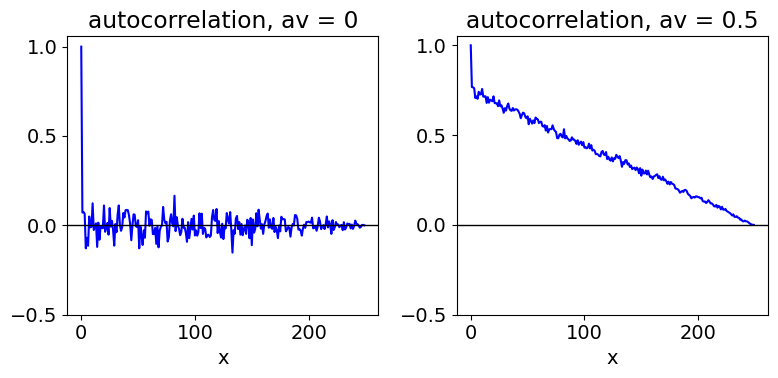

In [6]:
# Algorithm: Autocorrelation
#-----------------------
def do_autoc(f,w):       # Autocorrelation ac(k)= sum_i=0^{n-k} f(i)w(k+i) /norm
    n = len(w)
    ac = [0.0 for i in range(n)]
    sf = sum([f[i]**2 for i in range(n)])
    sw = sum([w[i]**2 for i in range(n)])
    normfw = np.sqrt(sf*sw)
    for k in range(n-1):
        s = 0.0
        for i in range(n-k):
            s = s + f[i]*w[k+i]
        ac[k] = s
    
    return ac/normfw
#----------------------

fig1= plt.figure(figsize=(8.0,4.0))
ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)

n = 250
s = [ np.random.rand() for i in range(n)]
t0= [i for i in range(n)]

ss = sum(s)/n                       # get average 
s0 = [s[i] - ss for i in range(n)]  # subtract average

ax0.plot(t0, do_autoc(s0,s0),color='blue') #  (S0, S0) is autocorrelation  
ax0.axhline(0,color='black',linewidth=1)
ax0.set_xlabel('x')
ax0.set_title('autocorrelation, av = 0')
ax0.set_yticks([-0.5,0.0,0.5,1])

ax1.plot(t0, do_autoc(s,s),color='blue')
ax1.axhline(0,color='black',linewidth=1)
ax1.set_xlabel('x')
ax1.set_title('autocorrelation, av = 0.5')
ax1.set_yticks([-0.5,0.0,0.5,1])
plt.tight_layout()

plt.show()

Fig. 33 Normalized autocorrelations of $250$ random numbers with an average of $0$ (left) and an average of $1/2$ (right). Only the right-hand half of the autocorrelation is calculated and plotted. The left-hand part is the exact mirror image.

_____

## 8.5 Autocorrelation of fluctuating and noisy signals

The autocorrelation of noise is now considered, and in the next section this will lead to understanding the shape of a spectroscopic transition and this is illustrated with NMR. Any experimental measurement is accompanied by noise. When measuring the properties of single atoms, molecules, or photons, considerable fluctuations in their measured values are expected and many events have to be averaged to obtain a precise result. The measured property might be energy, velocity, the number of photons in a given period measured by a photodiode, or the current in a transistor or diode when this is so small that discrete charge events are recorded. This latter noise is called _shot noise_. If you could hear shot noise, the effect would be rather similar to the sound of heavy rain falling on a car's roof. 

There is thermal noise in all resistors in electrical circuits that causes fluctuations in the current. These fluctuations are caused by the thermal motion of the many electrons as they pass through the inhomogeneous material forming the body of the resistor. The frequency of the noise measured on an oscilloscope is determined by the frequency with which the circuitry responds and therefore depends on the capacitance, resistance, and inductance. This generally produces noise with a spread of frequencies of about equal amplitude, except for multiples of mains frequency and those of switched-mode power supplies, and is called _white noise_. At low frequencies, the amplitude of the noise increases in direct proportion to $1/f$ where $f$ is frequency and is therefore called '$1/f$' noise. The origin of $1/f$ noise is not fully understood.

On the macroscopic scale, random noise also accompanies experimental measurements. Measuring the amount of any of the many trace gases, such as CO$_2$, IO$_2$, and NOx, in the atmosphere using optical techniques is an inherently noisy process. This is due to the continuous and erratic motion of air packets along the line of sight during the measurement and from one measurement to another. The frequency of the noise is, however, mostly limited to the speed at which the air changes. 

In the laboratory, all sorts of noise sources can affect an experiment; mostly these are due to voltage or current ripple in DC power supplies. In sensitive laser experiments, noise can be caused by dust particles in the air, vibrations of the building and from the air flow coming from air conditioning units. Atomic force microscopes have in the past needed to be suspended inside a sound proof box by elastic bungee ropes, to avoid adding noise to the measurements from the vibrations of the building and from nearby traffic. 

In an attempt to reduce noise a Fourier transform and an autocorrelation of the signal will provide information about the frequencies present, and how quickly they change, or alternatively, how long the noise persists,  and hence the possible source. The transform can also be used to remove noise as illustrated in Section 10.

Suppose that the noise on a measurement is represented by some fluctuating signal $f(t)$, the frequency of which is determined by the nature of the experiment and by the measuring apparatus. This signal will be represented by a general Fourier series similar to that in Section 1.1 but where $T$ is the period over which a measurement is made and the summation starts from zero as this makes the resulting equations simpler,

$$\displaystyle f(t)=\sum\limits_{n=0}^\infty a_n\cos \left(\frac{2\pi n t}{T}\right)+\sum\limits_{n=0}^\infty b_n\sin\left(\frac{2\pi n t}{T}\right)$$

Following Davidson (1962, chapter 14), the time average of $f$ and $f^2$ is the respective integral divided by the time interval $T$. The average $\langle f \rangle$ is zero because the noise is random, but the average of $f^2$ is not; the integral is

$$\displaystyle \langle f^2 \rangle =\frac{1}{T}\int\limits_0^T\left [\sum\limits_{n=0}^\infty a_n\cos \left(\frac{2\pi n t}{T}\right)+\sum\limits_{n=0}^\infty b_n\sin\left(\frac{2\pi n t}{T}\right)    \right]^2 dt$$

which simplifies considerably because of the orthogonality of the cosine integrals such as $\displaystyle \int \cos(2\pi \frac{nt}{T})\sin(2\pi \frac{mt}{T})dt=0$, $n$ and $m$ being integers, and the result is very simple;

$$\displaystyle \langle f^2\rangle = \frac{1}{2}\sum_n(a_n^2+b_n^2)  $$

This expression can also represent the average of many measurements if the coefficients $a$ and $b$ themselves represent average values. This means that the _ergodic hypothesis_ (or ergodic condition) applies, i.e. for a stationary system each part comprising the ensemble (of particles) will pass through all values accessible to it, given a sufficiently long time. Thus the time average is the same for all parts of the ensemble. This also means that the time average is the equivalent to the ensemble average.  To explain further; the word 'stationary' means that there is no preferred origin for the measurement, thus any time period over which measurements are made is just as good as any other. The ensemble average is taken over all coordinates of a system at a fixed time. The time average considers just a part of the ensemble averaged over a sufficiently long time. If the ergodic hypothesis applies these averages are equal.

The variance (the square of the standard deviation) on the signal is $\sigma^2=\langle f^2\rangle - \langle f\rangle^2 $ and in this case the standard deviation is $\sqrt{\langle f^2\rangle}$ and is the determined only by the amplitudes $a$, $b$ of the noise. The energy in the noise is  $a^2 + b^2$. 

The autocorrelation of $f(x)$ is 

$$\displaystyle A(u) =\langle f(t)f(u+t)\rangle =\frac{1}{T}\int_0^Tf(t)f(t+u)dt$$

which looks quite complicated when the substitution for $f$ is made. However, using the formulas for $\sin(A + B), \cos(A + B)$ and the orthogonality rules, a remarkably simple result is produced:

$$\displaystyle A(u)=\frac{1}{2}\sum_n\left(a_n^2+b_n^2\right)\cos\left(\frac{2\pi nu}{T} \right)  \qquad\tag{43}$$

which is an oscillating signal that will repeat itself with a period $T$.

## 8.6 Wiener–Khinchin relations

The autocorrelation (equation (43)) is related to the energy or power in a given signal. For example, with electromagnetic radiation the energy is the square of the amplitude $E$ of the electric field, the field is given by the constants $a$ and $b$ thus $a^2 + b^2$ represents the energy. This is also true of a sound wave in a fluid where the energy is proportional to the square of the oscillating pressure. There are other examples; the power dissipated in a resistor is proportional to the current squared and the kinetic energy of a molecule is proportional to the square of the velocity. Thus, in general if the signal is $f$, $\langle f^2\rangle$ represents the average energy or power. The period $T$ (equation (43)) is somewhat arbitrary and can reasonably take on any value; therefore, it is possible to define $n/T \equiv \nu_n$ as a frequency. The amount of power $P$ in a small frequency interval from $\nu$ to $\nu + \nu + \delta \nu$ is therefore $\displaystyle P(\nu)d\nu = \frac{1}{2}\left(a_\nu^2 + b_\nu^2\right)$ and the autocorrelation can be written as an integral over frequencies rather than a summation over index $n$. This effectively means that there are so many terms in the sum that it can be changed into an integral without any significant error, and doing this produces the autocorrelation;

$$\displaystyle A(u)=\int_{v=0}^\infty P(\nu)\cos(2\pi\nu u)d\nu  \qquad\tag{44}$$

Comparing this equation with a Fourier transform equation, the power spectrum is

$$\displaystyle P(\nu) = 4\int_{u=0}^\infty A(u)\cos(2\pi\nu u)d\nu \qquad\tag{45}$$

and these two equations are known as the _Wiener - Khinchin_ relationships: the power spectrum $P(\nu)$ and autocorrelation $A(u)$ form a Fourier transform pair. Very often the transform pair involve time and frequency, in which case the changes $u\to t$ and $P(\nu) \to J(\nu)$ are commonly made. In NMR and other spectroscopies $J(\omega)$ is called the spectral density.

The power spectrum is proportional to what we would normally observe in a spectroscopic experiment, as the change in the signal vs frequency. The width of the signal is determined by the autocorrelation and this is determined by the noise. If the noise is due to a random process then it is often found that the autocorrelation decays exponentially as $\displaystyle e^{-t/\tau}$ with rate constant $k=1/\tau$. In this case the power spectrum $J(\nu)$ is

$$\displaystyle J(\nu) =4\int_{u=0}^\infty e^{-u/\tau}\cos(2\pi \nu u)du = \frac{4\tau}{1+(2\pi\nu \tau)^2} \qquad\tag{46}$$

and the integral is most easily evaluated by converting the cosine to its exponential form. 

The nature of the random processes contributing to the power spectrum is now considered using NMR as an example. The nuclear spin angular momentum in a molecule remains in fixed precessing motion governed by the external magnetic field, but the molecules themselves also undergo random rotational diffusion due to thermal agitation when in solution. This random motion causes the nuclear spin to experience a fluctuating magnetic field in addition to the applied external field. Therefore, those nuclei undergoing NMR transitions experience this fluctuating field and its effect is to return the nuclear spin population to equilibrium with a lifetime called T1 (Sanders & Hunter 1987; Levitt 2001). The timescale of these fluctuations is of the order of tens of picoseconds because this is the timescale of molecular rotation. ( Translational diffusion is far slower ). The molecular rotation rate constant and hence frequency is similar to that of the NMR transition frequency (Larmor frequency) and therefore rotational diffusion can greatly influence the return to equilibrium of the nuclear spins and can dominate both the T1 and T2 decay processes. Loss of spin coherence is characterized by the lifetime T2. 

Molecular translational diffusion is far slower than rotation and so causes magnetic field fluctuations at a far lower frequency than the NMR transition and is therefore less important for T1 processes. Similarly, vibrational motion is too high to influence the NMR transition. Large molecules in a viscous solvent have a sluggish response and a small rotational diffusion coefficient, and long rotational relaxation times, and _vice versa_. However, while different solvents and molecules of different sizes will change the frequency of the random magnetic field fluctuations, the timescale remains comparable to that of the NMR transition. In proteins, while overall rotation can be slow, approximately tens of nanoseconds, faster local motion of residues called 'wobbling in a cone' motion still occurs. 

The autocorrelation of rotational diffusion can be shown to be an exponentially decaying function with a lifetime $\tau$ proportional to the reciprocal of the rotational diffusion coefficient. Fig. 34 shows the spectral density calculated for different rotational relaxation times. The coupling of the magnetic field fluctuations is most effective when $1/2\pi\tau$ is close to the Larmor frequency and therefore molecules of different sizes will be affected differently.

When plotted on a linear scale the spectral density of a slowly decaying exponential autocorrelation, equation 46, is a narrow function centred at zero frequency, whereas the rapidly decaying autocorrelation has the same shape but is wide. Zero frequency here means the transition frequency, see fig 34. The line-width is a consequence of the time-energy or time-frequency uncertainty, causing a wide spectral line when processes are rapid and vice versa. When plotted on a linear - log scale the power spectrum is constant over a wide range of low frequencies, and this is called 'white noise'. It rapidly decreases, centred about the frequency $1/2\pi\tau$ as is shown in the figure. If the noise were completely random, the power spectrum would be constant at all frequencies.

The Weiner - Khinchin theorem also shows that the autocorrelation of the signal $f$ is the squared modulus of its Fourier transform $g(k)$. Apart from a constant of proportionality, this is

$$\displaystyle A_a(u) =\int_{-\infty}^\infty f^*(t)f(u+t)dt = T[|g(t)|^2] $$

Because the squared modulus of the Fourier transform is produced, the autocorrelation has lost all phase information so it is not possible to invert or reverse $g(k)$ to produce the original function $f$. Thus, in the NMR case, it is not possible to measure the spectral density, which is proportional the shape of the NMR transition, and then work backwards to obtain the function that produced this shape. All that can be done is to generate a model of the interactions, such as rotational diffusion, and, for example, by a non-linear, least-squares method fit this theoretical model to the data.

![Drawing](fourier-fig34.png)

Figure 34. Left: Power spectra (or spectral density) vs. frequency for a signal that has an exponential autocorrelation function, the decay lifetimes of the exponentials are from $1 \to 100$ ps. The density of the fluctuation in the noise is almost constant at lower frequencies and this is called 'white noise'. 

## 8.7 FTIR supplement

An overview of the FTIR spectrometer was given in section 5.2 and a schematic shown in figure 12. Here we discuss how the instrument measures the spectrum even though both beams pass through the sample and a single detector is used. This is unlike the situation in a uv-vis spectrophotometer where the light is split and passes separately through a sample and a reference cell and the signals from two detectors compared. 

Recall that the FTIR instrument is a Michelson interferometer in which the input beam is made parallel and has a round cross-section as it passes through the instrument. This beam contains all wavelengths, its amplitude is divided at the beam splitter, and finally recombined onto a single detector whose output produces 'fringes' as one arm moves relative to the other. If $d$ is the difference in distance travelled by the beams they arrive at the detector at times separated by a delay of $\tau=d/c$ seconds. The detector measures the _intensity_ $I$ which is the complex square of the amplitude of any wave $f^*f = |f|^2$. If the i.r. radiation is hypothetically monochromatic with frequency $\omega_0$ as the mirror is translated the detector measures a sinusoidally varying signal as the pathlength $\tau$ varies because the i.r. waves become in and out of phase with one another.

The _amplitude_ or field is $f=ae^{i\omega_0 t}$ at frequency $\omega_0$ ($\equiv 2\pi \nu_0$) and at the detector the fields at time $t$ and $t+\tau$ are recombined as

$$\displaystyle I(\tau)=\beta \int |f(t)+f(t+\tau)|^2dt \qquad\tag{46a}$$

where $\beta$ is the product of reflectivity and transmission of the beam splitter. The signal is averaged at each time delay $\tau$ for a small time $t_m$, say a second. Expanding out (and ignoring limits for clarity) gives

$$\displaystyle \begin{align}I(\tau)/\beta &= \int\; \Big(f^*(t)+f^*(t+\tau)\Big) \Big( f(t)+f(t+\tau) \Big)\;dt\\&=\int f^*(t)f(t)dt+\int f^*(t)f(t+\tau)dt +\int f(t)f^*(t+\tau)dt +\int f^*(t+\tau)f(t+\tau)dt\end{align}$$

The first and last integrals are just the average intensity which is constant, for example 

$$\displaystyle \int_0^{t_m} f^*(t+\tau)f(t+\tau)dt=a^2\int_0^{t_m} e^{-i\omega_0((t+\tau)}e^{+i\omega_0((t+\tau)} dt=a^2t_m$$

The other integrals are autocorrelations

$$\displaystyle \begin{align}\int_0^{t_m} f^*(t)f(t+\tau)+ f(t)f^*(t+\tau) dt &= a^2\int_0^{t_m}e^{-i\omega_0 t}e^{i\omega_0 (t+\tau)}+e^{+i\omega_0 t}e^{-i\omega_0 (t+\tau)}dt\\ &=a^2t_m (e^{i\omega_0 \tau}+e^{-i\omega_0 \tau})\end{align}$$
 
making 

$$\displaystyle I(\tau)= (2+e^{i\omega_0 \tau}+e^{-i\omega_0 \tau})C$$

collecting the constants as $C=a^2\beta t_m$. As $\displaystyle 2\cos(\omega_0\tau)=e^{i\omega_0 \tau}+e^{-i\omega_0 \tau}$, then

$$\displaystyle I(\tau)=C (1+\cos(\omega_0\tau) )$$

which shows the sinusoidal variation on top of a constant signal. Recall that as $\tau =d/c$ the time delay is equivalent to a distance moved by the interferometer. 

Molecules naturally have many vibrational and rotational transitions, think of the HCl rotational/vibration spectrum for example, and therefore the field at the detector will be the sum of many different frequencies, we call this distribution $B(\omega)$, which is the spectrum we hope to measure, and therefore

$$\displaystyle I(\tau) =\int_0^\infty B(\omega)(1+\cos(\omega\tau) )d\omega$$

where the constant is absorbed into $B$ and the integral is added because the detector measures all frequencies $\omega$ at the same time. At zero delay $\tau=0,\, I(0)=2\int B(\omega)d\omega$ which is a constant and shows that at time zero twice the total signal is measured. After rearranging 

$$ I(\tau)- I(0)/2=\int_0^\infty B(\omega)\cos(\omega\tau) d \omega$$

This is a fourier cosine transform and can be reverse transformed to give

$$\displaystyle B(\omega) = \int_0^\infty \left(I(\tau)-\frac{I(0)}{2}\right)\cos(\omega\tau)d\tau\qquad\tag{46b}$$

which is the basic equation for FTIR and is the cosine fourier transform of $(I(\tau)-I(0)/2) $ where $I(\tau)$ is the intensity the detector measures at delay time $\tau$. As $\tau$ changes this function will oscillate up and down as the phase between the two arms changes due to both pathlength change and absorption in the sample. How the transform extracts a signal is explained earlier in the chapter, see 6.4. To see that this equation is a fourier transform recall that $\displaystyle 2\cos(\omega\tau)=e^{i\omega \tau}+e^{-i\omega \tau}$. The integration ranges from $0\to \infty$ which in practice is the distance that becomes $\approx 500\to \approx 4000\; \mathrm{cm^{-1}}$. Note that for each frequency $\omega$ the integration on the right has to be performed. Normally this will be done numerically using a fast four transform FFT.

At very long times there can no longer be any correlation between the two arms and the signal remaining is due to that of the two separate arms, the constant terms from eqn 46a, making the long time value $I(0)/2$.  

So far we have tried to explain how the fourier transfer picks out transition _frequencies_ but their _magnitudes_ are also obtained and this is more subtle because both beams pass through the sample and contain the same frequencies. It is obvious that any absorption will affect the i.r. beam's intensity, but both beams pass through the sample and are equally affected.  The reason that the absorption magnitude can be measured is that the _phase of the combined wave_ (one from each arm) is determined by the relative magnitude of each transition. This happens because the absorption of amplitude $a_i$ of a wave of frequency $\omega_i$ contributes to the sum $\sum_i a_ie^{i\omega_i \tau}=a_0\sum_i e^{i\omega_i \tau+i\varphi_i}$ and so the phase of the autocorrelation vs. $\tau$ is changed. This is shown in figure 34a for two transitions, in the first row of panels, the lower frequency is of greater intensity, and in the lower panel they are swapped in intensity but still have the same frequencies. The left most column (A, and D) shows the two waves vs. mirror displacement $\tau$ in the two cases. The yellow shading (around $\tau=90$) shows where the difference between them is most obvious, of course this repeats at each period. The centre panels  (B & E; autocorrelations) shows the combined waves vs. displacement $\tau$ and on the right the spectrum obtained by fourier transform of the autocorrelations.

![Drawing](fourier-fig34a.png)

Figure 34a. Left column shows individual amplitudes of the waves of frequency $\omega_0, \omega_1$. The centre column shows how the autocorrelations differ when the amplitudes are different even though the two frequencies are unchanged. The yellow mask shows a region of most noticeable change. The right most column shows the spectrum computed from its autocorrelation. After A.Lipson 2011.
______

## 8.8 Spectral resolution

In calculating the fourier transform. eqn 46b, the limits were taken to $0\to \infty$ and of course in an instrument this is clearly impossible, where the delay to one arm may extend only to a centimetre or so a time delay of $\approx 0.033$ ns. The limited range has the effect of convoluting a top-hat or rectangular shape with the delta function response of the ideal case when limits are $\pm \infty$. The result is a sinc function as shown in figures 15, i.e. a peak surrounded by many decreasing oscillations. In this respect the FTIR does distort the shape of the transition from its true Lorentzian shape, not that this matters in practice where only the frequency is important and the intensity only characterised as 'weak', to 'strong'. More important is the resolution because the longer the maximum delay the narrower the peaks become and so finer features become distinguishable. The fwhm of the sinc function is $0.6035/d_m$ where $d_m$ is the maximum displacement of one arm of the interferometer vs. the other. If this distance is $1$ cm then the resolution will be $0.6\;\mathrm{cm^{-1}}$. Typically this would involve a transform of $2^{13}=8192$ points or a step of $1.2\;\mathrm{\mu m}$.  

The calculation is 

$$\displaystyle \frac{1}{\sqrt{2\pi}}\int_0^{d_m} e^{-i\omega L}dL=\frac{d_m}{\sqrt{2\pi}}\frac{\sin(2\pi\bar\nu d_m)}{2\pi\bar\nu d_m}$$

where $\omega=2\pi\bar \nu$ and $\bar\nu$ is in wavenumbers.

![Drawing](fourier-fig34b.png)

Figure 34b. The function $\text{sinc}(x)=\sin(\pi x)/(\pi x)$. Using $\pi x$ makes the zeros of the function appear at integer $x$ values and the fwhm is $1.207/2d_m$ where $d_m$ is the maximum path length difference.
_________

Because of the distorting effect of the oscillations in the sinc function the fourier transform is apodised, that is, it is multiplied by a function that decreases with $x$, there are several forms of these, they all damp-out the oscillations but at a cost of broadening the transition, there is therefore a play-off between removing oscillations and hence removing distortion and loss of resolution. Bracewell (1986) gives examples of these and other aspects of fourier transforms.
